In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
def plot_all_boxplots(df):
    num_col = df.select_dtypes(include=['number']).columns.tolist()
    plt.figure(figsize=(15, 8))
    for i, col in enumerate(num_col):
        plt.subplot(1, len(num_col), i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
        plt.tight_layout()
    plt.show()

In [ ]:
def plot_all_histograms(df):
    df = df.replace([float('inf'), float('-inf')], float('nan'))
    num_col = df.select_dtypes(include=['number']).columns.tolist()
    n_cols = 2
    n_rows = (len(num_col) + 1) // n_cols
    plt.figure(figsize=(12, 2 * n_rows))
    for i, col in enumerate(num_col):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(df[col], kde=True, bins=45, color='blue')
        plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
duplicates_count = df.duplicated().sum()
print(f"The number of duplicates: {duplicates_count}")

The number of duplicates: 1


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(302, 14)

In [ ]:
duplicates_count = df.duplicated().sum()
print(f"The number of duplicates: {duplicates_count}")

The number of duplicates: 0


In [ ]:
df["target"].value_counts()

,count
target,
1,164
0,138


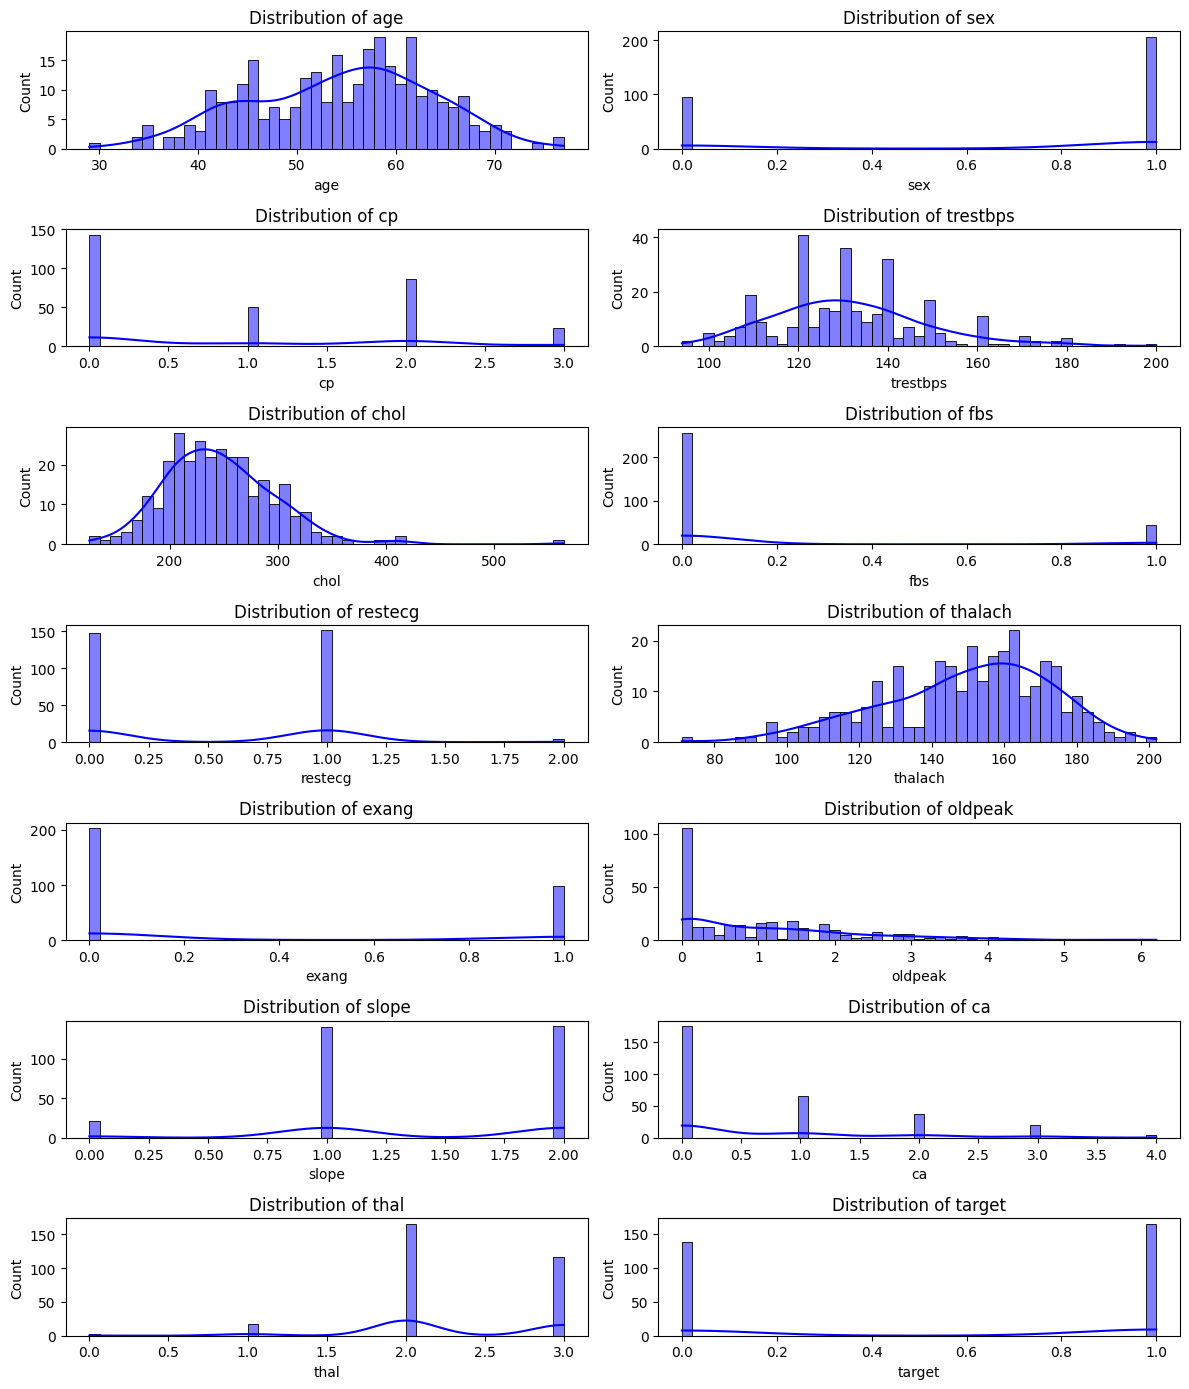

In [ ]:
plot_all_histograms(df)

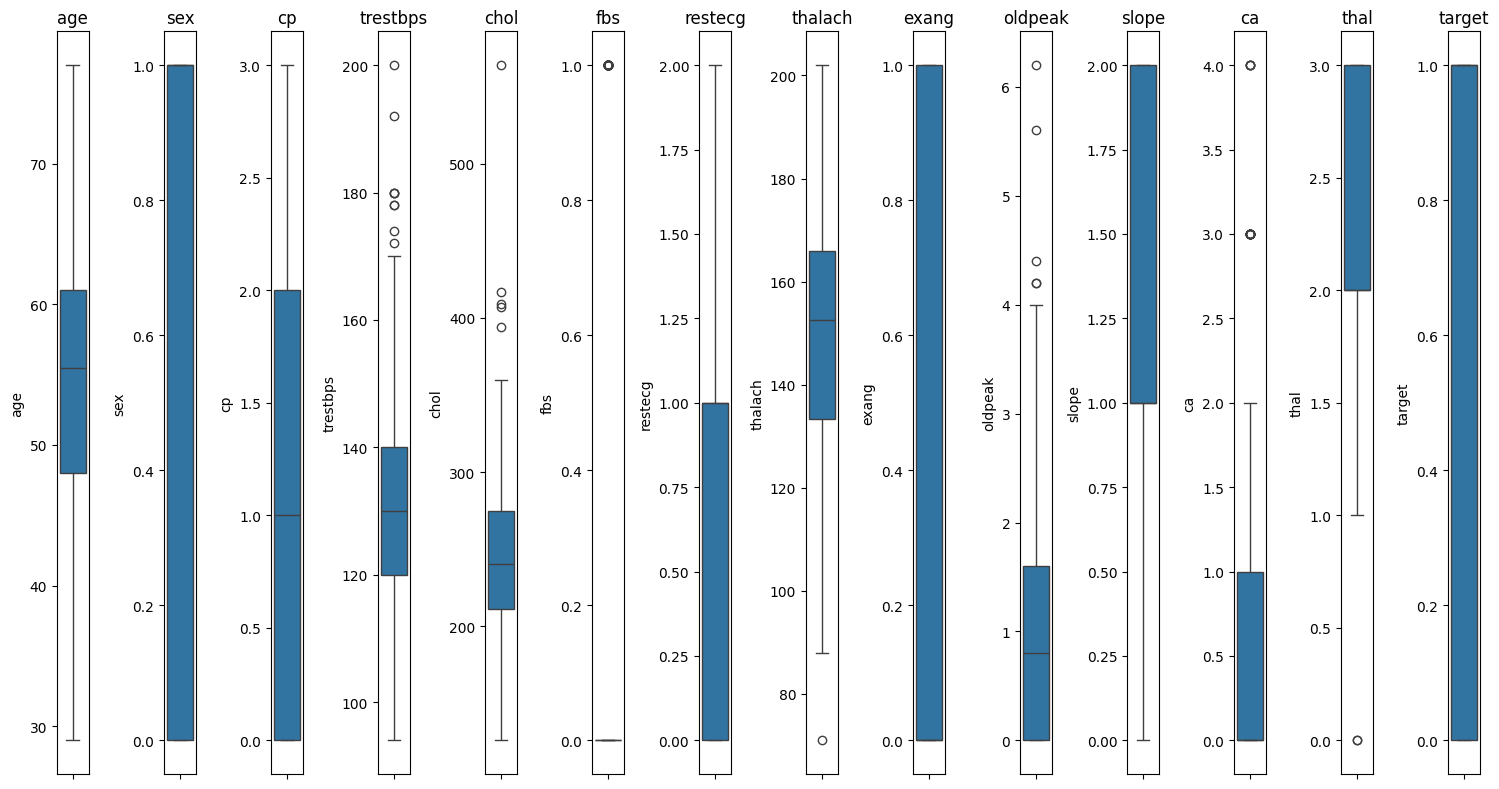

In [ ]:
plot_all_boxplots(df)

In [ ]:
df.corr()['target']

,target
age,-0.221476
sex,-0.283609
cp,0.432080
trestbps,-0.146269
chol,-0.081437
fbs,-0.026826
restecg,0.134874
thalach,0.419955
exang,-0.435601
oldpeak,-0.429146


<Axes: >

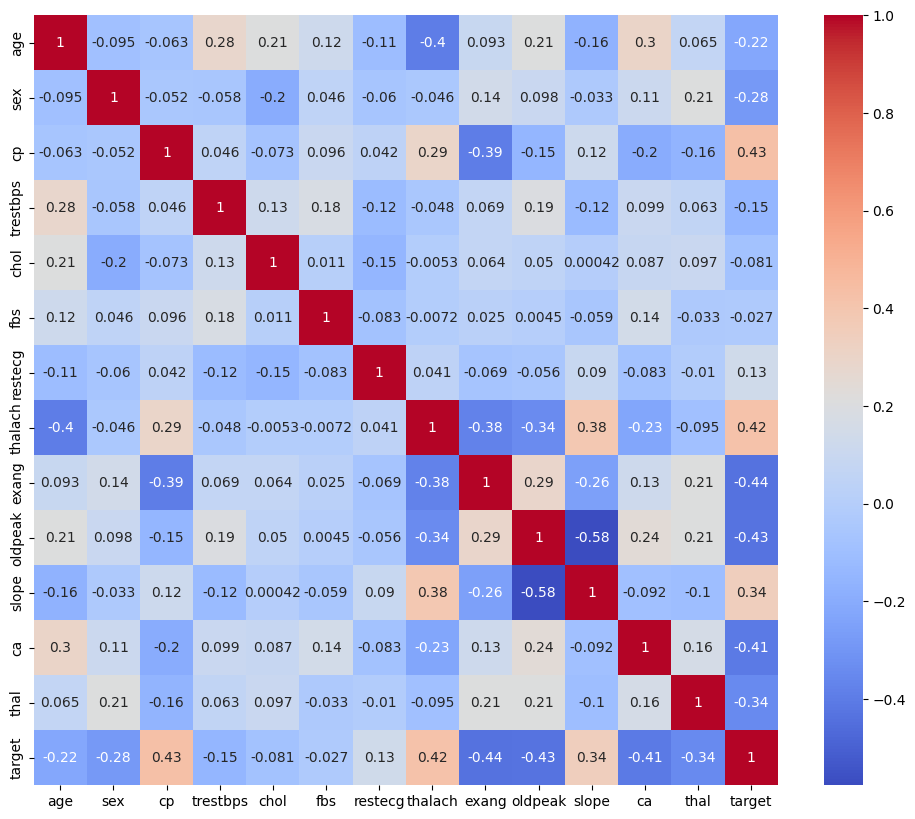

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
X, y = df.drop(columns=['target']), df['target']

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts()

,count
target,
0,132
1,130


In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.68      0.72      0.70        32
    Presence       0.72      0.68      0.70        34

    accuracy                           0.70        66
   macro avg       0.70      0.70      0.70        66
weighted avg       0.70      0.70      0.70        66



In [ ]:
param_grid_1 = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [ ]:
param_grid_2 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [ ]:
param_grid_3 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'ccp_alpha': [0.0, 0.01, 0.05]
}

In [ ]:
grid_search_1 = GridSearchCV(estimator=model,
                             param_grid=param_grid_1,
                             cv=5,
                             verbose=1,
                             n_jobs=-1,
                             scoring='accuracy')

In [ ]:
grid_search_1.fit(X_train, y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [ ]:
best_model_1 = grid_search_1.best_estimator_

In [ ]:
y_pred = best_model_1.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.89      0.75      0.81        32
    Presence       0.79      0.91      0.85        34

    accuracy                           0.83        66
   macro avg       0.84      0.83      0.83        66
weighted avg       0.84      0.83      0.83        66



In [ ]:
grid_search_2 = GridSearchCV(estimator=model,
                             param_grid=param_grid_2,
                             cv=5,
                             verbose=1,
                             n_jobs=-1,
                             scoring='accuracy')

In [ ]:
grid_search_2.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [ ]:
best_model_2 = grid_search_2.best_estimator_

In [ ]:
y_pred = best_model_2.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.74      0.78      0.76        32
    Presence       0.78      0.74      0.76        34

    accuracy                           0.76        66
   macro avg       0.76      0.76      0.76        66
weighted avg       0.76      0.76      0.76        66



In [ ]:
grid_search_3 = GridSearchCV(estimator=model,
                             param_grid=param_grid_3,
                             cv=5,
                             verbose=1,
                             n_jobs=-1,
                             scoring='accuracy')

In [ ]:
grid_search_3.fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.05],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=1)

In [ ]:
best_model_3 = grid_search_3.best_estimator_

In [ ]:
y_pred = best_model_3.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.72      0.72      0.72        32
    Presence       0.74      0.74      0.74        34

    accuracy                           0.73        66
   macro avg       0.73      0.73      0.73        66
weighted avg       0.73      0.73      0.73        66



# Model 2 performs the best

In [ ]:
y_pred = best_model_1.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Absence', 'Presence']))

              precision    recall  f1-score   support

     Absence       0.89      0.75      0.81        32
    Presence       0.79      0.91      0.85        34

    accuracy                           0.83        66
   macro avg       0.84      0.83      0.83        66
weighted avg       0.84      0.83      0.83        66



In [ ]:
print(grid_search_1.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [ ]:
y_prob = best_model_1.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

<Figure size 640x480 with 0 Axes>

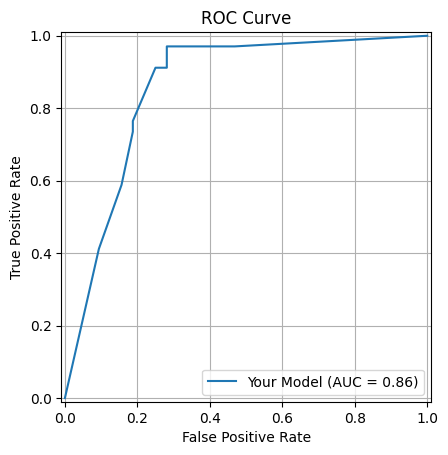

In [ ]:
plt.figure()
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score, estimator_name='Your Model').plot()
plt.title('ROC Curve')
plt.grid()
plt.show()

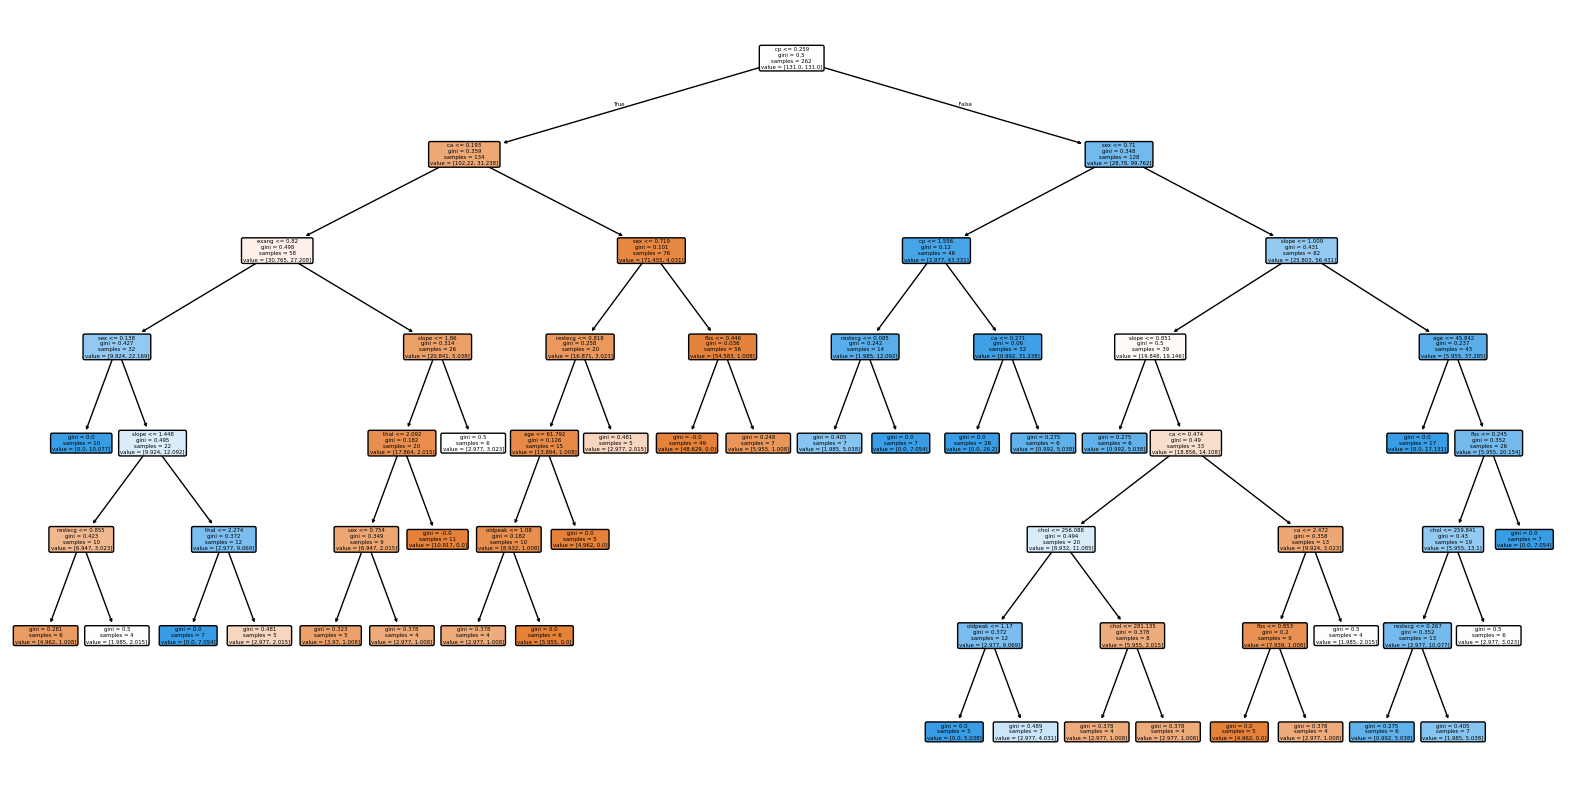

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(best_model_1, filled=True, rounded=True, feature_names=X.columns)
plt.show()